In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [106]:
data = pd.read_csv("/content/diabetes2.csv")

In [107]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [108]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


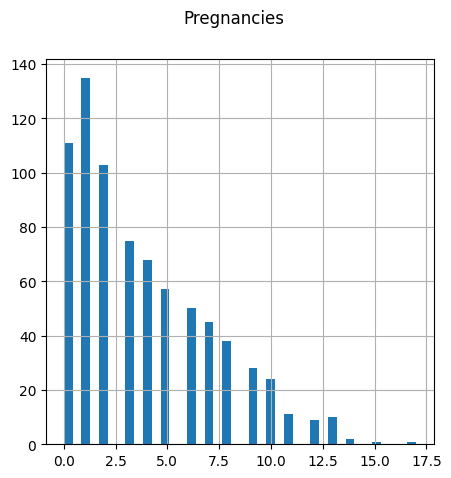

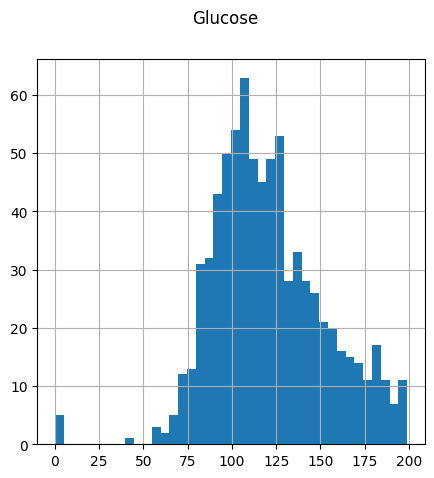

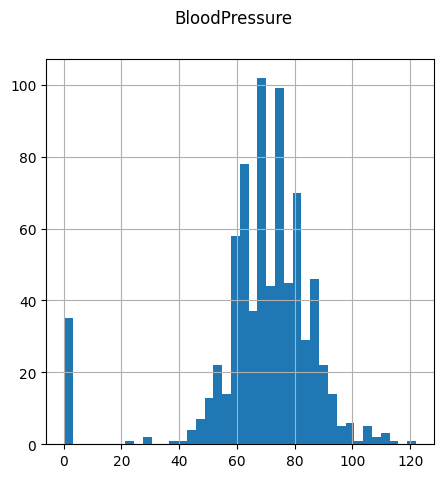

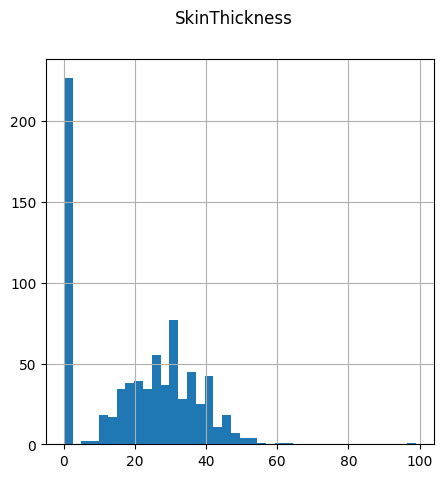

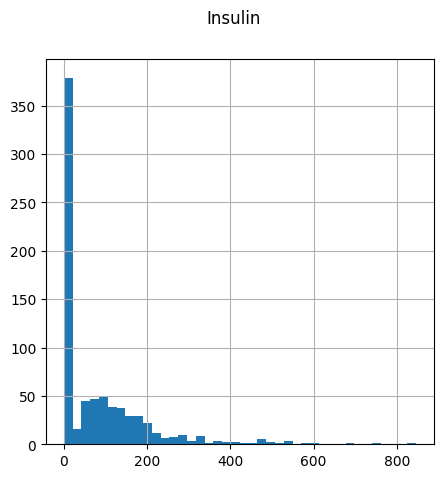

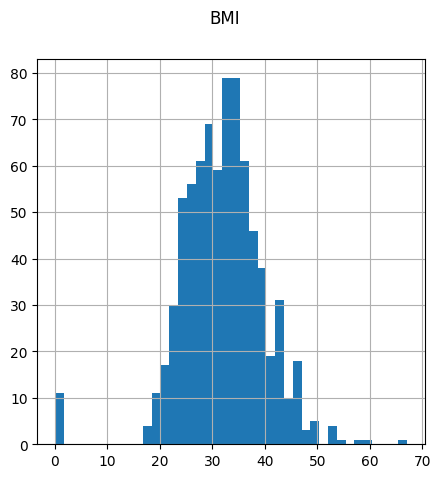

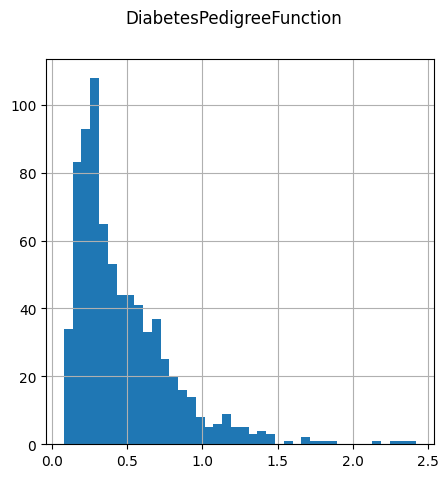

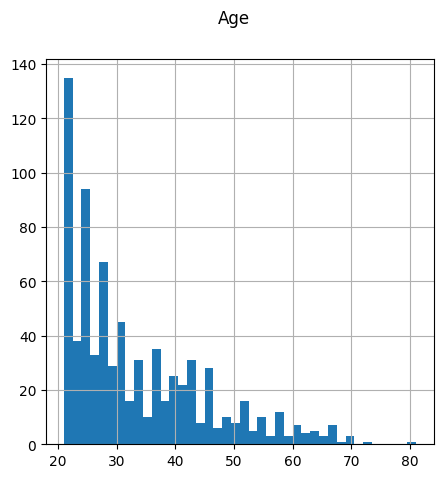

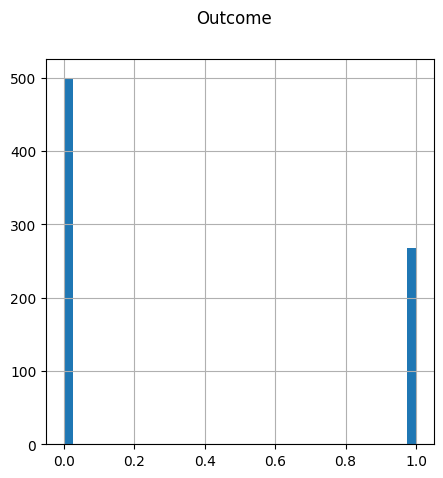

In [109]:
for i in data.columns:
    data[i].hist(bins=40, figsize=(5,5))
    plt.suptitle(i)
    plt.show()

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


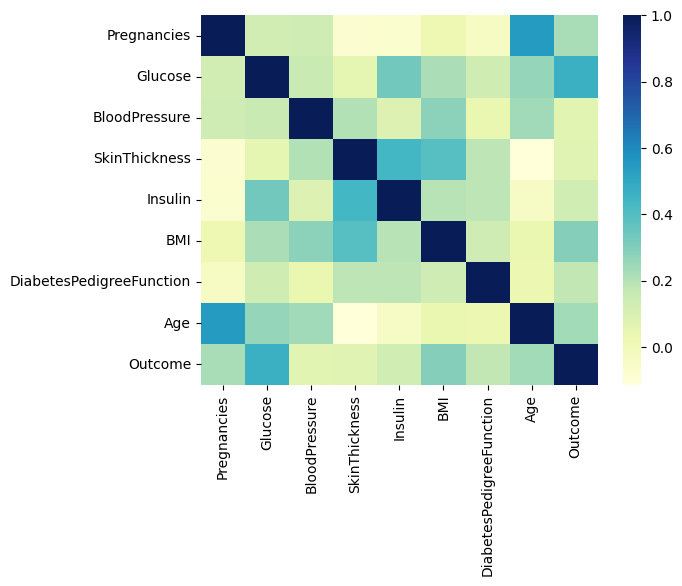

In [112]:
sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu')
plt.show()

In [113]:
processed_data = data.copy()
processed_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
X = processed_data.iloc[:,0:8]
y = processed_data.iloc[:,8:9]

In [115]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        self.scaler = StandardScaler()
        return self
    def transform(self, X):
        X = X.copy()
        for feature in X.columns:
            X[feature] = self.scaler.fit_transform(X[[feature]])
        return X

In [116]:
pipeline = Pipeline(
    [('featurencoder',FeatureEncoder())]
)

In [117]:
X = pipeline.fit_transform(X)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Score',  model.score(X_train,y_train))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Model Score 0.7703583061889251
Accuracy: 75.32%


In [121]:
model.intercept_

array([-0.85594942])

In [122]:
model.coef_

array([[ 0.21624195,  1.06932996, -0.25867641,  0.04720329, -0.19899822,
         0.79237086,  0.22709403,  0.43036184]])

In [123]:
# Create summary table with coeef and feat
feature_name = X.columns.values
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(model.coef_)
summary_table

,Feature name,Coefficient
0,Pregnancies,0.216242
1,Glucose,1.069330
2,BloodPressure,-0.258676
3,SkinThickness,0.047203
4,Insulin,-0.198998
5,BMI,0.792371
6,DiabetesPedigreeFunction,0.227094
7,Age,0.430362


In [124]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
2,Glucose,1.069330,2.913427
6,BMI,0.792371,2.208627
8,Age,0.430362,1.537814
7,DiabetesPedigreeFunction,0.227094,1.254948
1,Pregnancies,0.216242,1.241403
4,SkinThickness,0.047203,1.048335
5,Insulin,-0.198998,0.819551
3,BloodPressure,-0.258676,0.772073
0,Intercept,-0.855949,0.424880
